In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import ParagraphStyle
import os
import PyPDF2
sns.set_style("darkgrid")

In [125]:
data = pd.read_csv('dados/Result_5.csv')
data.cliente.unique()

array([3302973, 3512116, 3548823, 4104923, 4113617, 4119218, 4128219,
       4202172, 4202519, 4202816, 4203024, 4204624, 4205918, 4207617,
       4208417, 4208565, 4209021, 4209217, 4210116, 4210720, 4212015,
       4212924, 4213318, 4213615, 4215115, 4215917, 4218317, 4323117])

In [136]:
#Filtrando o cliente
cliente = 4213318

In [137]:
data = pd.read_csv('dados/Result_5.csv')
data = data.query('cliente=={}'.format(cliente))

In [138]:
#Criando uma nova coluna somente com os meses e os anos
data['mes'] = data.dia_mes_ano.apply(lambda x: x[0:7])

In [133]:
data

,cliente,dia_mes_ano,unidade,equipe,profissional_categoria,tipo_registro,total,mes
1286331,4212015,2022-11-06,2418435,413052,acs,fci,1,2022-11
1286332,4212015,2022-11-06,2418435,1630155,enfermeiro,fci,1,2022-11
1286333,4212015,2022-11-06,2624787,413234,acs,fci,3,2022-11
1286334,4212015,2022-11-06,2624817,413242,acs,fci,1,2022-11
1286335,4212015,2022-11-06,2624817,413250,acs,fci,1,2022-11
...,...,...,...,...,...,...,...,...
1344736,4212015,2023-07-17,7798008,2172738,acs,fci,14,2023-07
1344737,4212015,2023-07-17,7798008,2172738,enfermeiro,fci,2,2023-07
1344738,4212015,2023-07-17,7798008,2172738,medico,fai,30,2023-07
1344739,4212015,2023-07-17,7798008,2172738,medico,fp,30,2023-07


#### Gráfico demonstrando a magnitude do cliente no decorrer dos meses

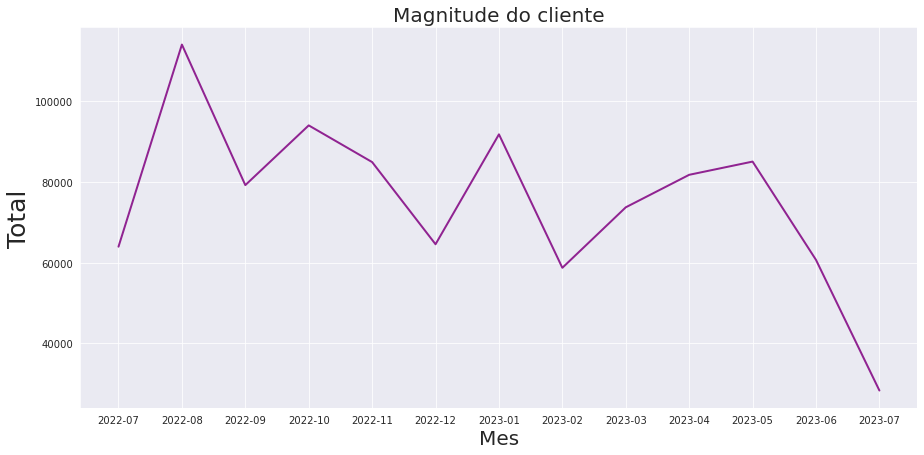

In [139]:
magnitude = data.pivot_table(
    'total', 'mes', 
    aggfunc='sum'
).reset_index()

plt.figure(figsize=(15,7))
plt.title('Magnitude do cliente', fontsize=20)
plt.ylabel('Total', fontsize=25)
sns.lineplot(data=magnitude, x='mes', y='total', alpha=0.85, linewidth=2, color='purple')
plt.xlabel('Mes', fontsize=20)
plt.ylabel('Total', fontsize=25)
plt.savefig('graficos/mag_cliente.png')
plt.show()

#### Gráfico para demonstrar os tipos de registros mais relevantes

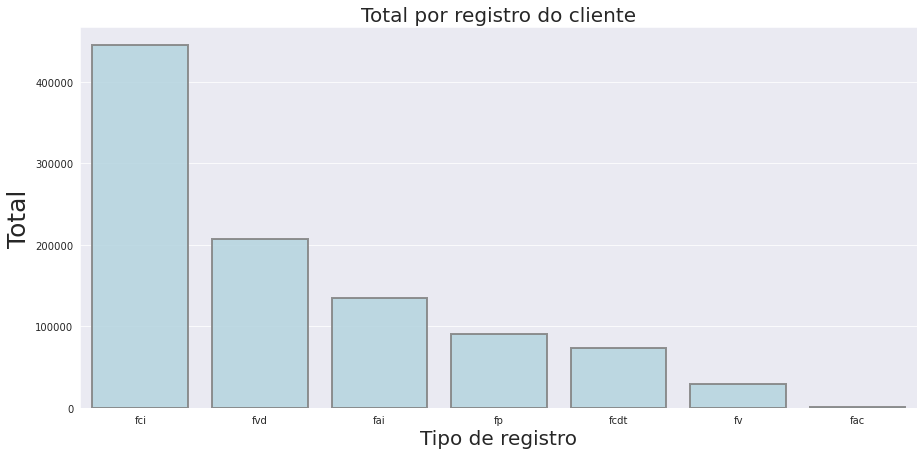

In [186]:
tipo_de_registro = data.pivot_table(
    'total', 'tipo_registro',
    aggfunc='sum'
).sort_values('total', ascending=False).reset_index()

plt.figure(figsize=(15,7))
plt.title('Total por registro do cliente', fontsize=20)
plt.ylabel('Total', fontsize=25)
sns.barplot(data=tipo_de_registro, x='tipo_registro', y='total', alpha=0.85, linewidth=2, edgecolor="gray", color='lightblue')
plt.xlabel('Tipo de registro', fontsize=20)
plt.ylabel('Total', fontsize=25)
plt.savefig('graficos/registro.png')
plt.show()

#### Gráfico para demonstrar o total por profissional

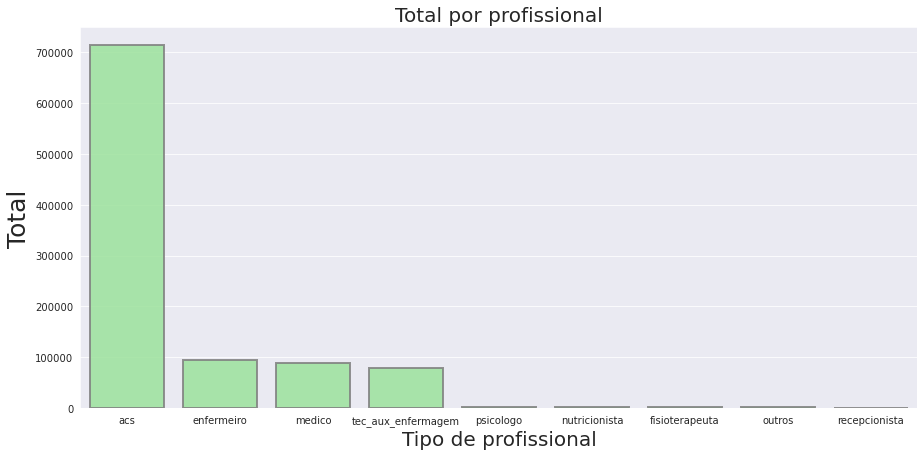

In [185]:
prof_por_categoria = data.pivot_table(
    'total', 'profissional_categoria',
    aggfunc='sum'
).sort_values('total', ascending=False).reset_index()

plt.figure(figsize=(15,7))
plt.title('Total por profissional', fontsize=20)
plt.ylabel('Total', fontsize=25)
sns.barplot(data=prof_por_categoria, x='profissional_categoria', y='total', alpha=0.85, linewidth=2, edgecolor="gray", color='lightgreen')
plt.xlabel('Tipo de profissional', fontsize=20)
plt.ylabel('Total', fontsize=25)
plt.savefig('graficos/prof.png')
plt.show()

#### Gerar PDFs

In [227]:
def generate_pdf(title, logo_image, graph_image, description, output_path):
    def mp(mm):
        return mm / 0.352777

    cnv = canvas.Canvas(output_path, pagesize=A4)
    cnv.setFont(psfontname='Helvetica-Bold', size=25)
    cnv.drawString(mp(65), mp(250), title)

    cnv.drawImage(logo_image, mp(0), mp(250), width=125, height=125)
    cnv.drawImage(graph_image, mp(7), mp(97), width=580, height=340)
        
    font_name = 'Helvetica'
    font_size = 15
    x = 65
    y = 240
    lines = description.split('\n')
    cnv.setFont(font_name, font_size)
    for line in lines:
        cnv.drawString(x, y, line)
        y -= 20

    cnv.rect(mp(13), mp(97), width=520, height=340)

    cnv.save()

In [228]:
# Total do cliente no decorrer dos meses

total_do_cliente = data['total'].sum()
mes_de_destaque = data.pivot_table(
    values='total', index='mes',
    aggfunc='sum'
).sort_values('total', ascending=False)
mes_maior_valor = mes_de_destaque.index[0]
total_maior_valor = mes_de_destaque.iloc[0]['total']

title = "Total por cliente"
logo_image = "imagens/logo.jpeg"
graph_image = "graficos/mag_cliente.png"
output_path = 'PDFs/cliente_total_mes.pdf'

description = (
    f"Total do cliente {cliente} ao longo do período entre 07/22 e 07/23: {total_do_cliente}.\n"
    f"O mês e ano com maior destaque foi {mes_maior_valor}, com o total de {total_maior_valor}"
)
generate_pdf(title, logo_image, graph_image, description, output_path)

In [229]:
# Total do cliente por registro no decorrer dos meses

tipo_de_registro = data.pivot_table(
    'total', 'tipo_registro',
    aggfunc='sum'
).sort_values('total', ascending=False)

maior_registro = tipo_de_registro.index[0]
total_maior_valor = tipo_de_registro.iloc[0]['total']

title = "Total por Registro"
logo_image = "imagens/logo.jpeg"
graph_image = "graficos/registro.png"
output_path = 'PDFs/cliente_total_registro.pdf'


description = (
    f"Total do cliente {cliente} por registro no período entre 07/22 e 07/23.\n"
    f"O registro com maior destaque foi o {maior_registro}, com o total de {total_maior_valor}"
)
generate_pdf(title, logo_image, graph_image, description, output_path)

In [230]:
# Total do cliente por profissão no decorrer dos meses

prof_por_categoria = data.pivot_table(
    'total', 'profissional_categoria',
    aggfunc='sum'
).sort_values('total', ascending=False)

maior_prof = prof_por_categoria.index[0]
total_maior_valor = prof_por_categoria.iloc[0]['total']

title = "Total por Profissão"
logo_image = "imagens/logo.jpeg"
graph_image = "graficos/prof.png"
output_path = 'PDFs/cliente_total_prof.pdf'


description = (
    f"Total do cliente {cliente} por profissão no período entre 07/22 e 07/23.\n"
    f"A profissão com maior destaque foi o {maior_prof}, com o total de {total_maior_valor}"
)
generate_pdf(title, logo_image, graph_image, description, output_path)

In [231]:
merger = PyPDF2.PdfMerger()

pdf_files_directory = 'PDFs'
output_pdf_path = 'PDFs/pdf_final.pdf'

pdf_files = [file for file in os.listdir(pdf_files_directory) if file.endswith('.pdf')]

for pdf_file in pdf_files:
    merger.append(os.path.join(pdf_files_directory, pdf_file))

with open(output_pdf_path, 'wb') as output_pdf:
    merger.write(output_pdf)

print("PDF saved.")

PDF saved.
